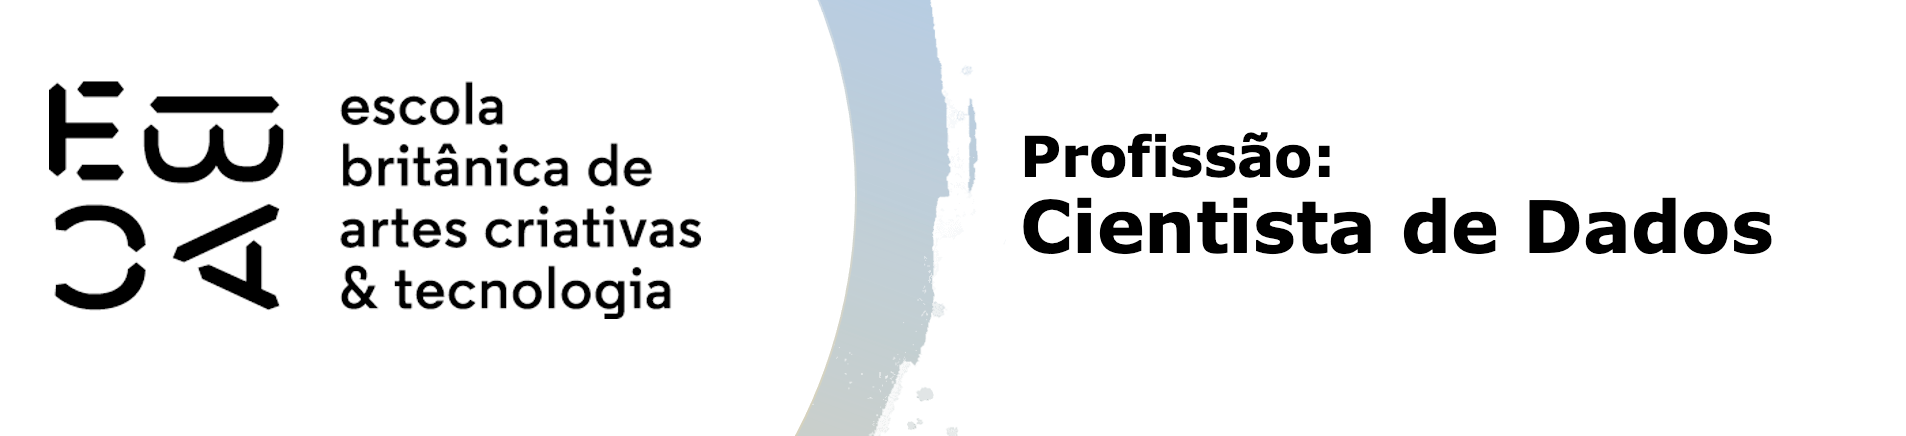

# Regressão III - Tarefa

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.interpolate import interp1d 
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('./Dados/previsao_de_renda_II.csv', index_col=0)
df.head()

,index,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
data_ref,,,,,,,,,,,,,
2015-01-01,5762,M,S,N,0,Empresário,Superior completo,Casado,Casa,47,16.717808,2.0,11138.14
2015-01-01,1279,M,S,N,0,Assalariado,Superior incompleto,Casado,Casa,30,9.600000,2.0,2424.81
2015-01-01,14111,M,S,N,0,Assalariado,Superior completo,Casado,Casa,28,8.208219,2.0,13749.66
2015-01-01,8189,M,N,S,2,Assalariado,Médio,Casado,Casa,44,1.301370,4.0,2361.84
2015-01-01,1830,F,N,S,2,Assalariado,Superior completo,Casado,Casa,33,1.254795,4.0,790.78


## Avalie valores missing e substitua pela média

Neste exercício não vamos nos preocupar com valores *missing*. Substitua-os pela média.

In [3]:
df.loc[df['tempo_emprego'].isna(), 'tempo_emprego'] = df['tempo_emprego'].mean()

### Base de testes

Separe os três últimos meses como base *holdout* (base de teste).

In [4]:
is_test = pd.to_datetime(df.index) >= (pd.to_datetime(df.index[-1]) - pd.Timedelta(days=3*30))

In [5]:
df.reset_index(inplace=True)
df.drop(columns=['data_ref', 'index'], inplace=True)

In [6]:
df_test = df[is_test].copy()
df = df[~is_test]

### Primeiro modelo
 Não use *index* e não use a data. Avalie o modelo com o $R^2-ajustado$

In [7]:
df['log_renda'] = np.log(df['renda'])
df_test['log_renda'] = np.log(df_test['renda'])

In [8]:
reg = smf.ols('log_renda ~ tempo_emprego + idade + sexo + posse_de_imovel + tipo_renda + educacao', data=df).fit()

In [9]:
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_renda   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 3.890e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        16:02:55   Log-Likelihood:            -7.9758e+05
No. Observations:              600000   AIC:                         1.595e+06
Df Residuals:                  599987   BIC:                         1.595e+06
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                           7.8851      0.013    620.341      0.000       7.860       7.910
sexo[T.M]                           0.1364      0.003     52.459      0.000       0.131       0.142
posse_de_imovel[T.S]                0.1837      0.003     72.330      0.000       0.179       0.189
tipo_renda[T.Bolsista]             -0.2233      0.052     -4.258      0.000      -0.326      -0.121
tipo_renda[T.Empresário]            0.1447      0.003     48.483      0.000       0.139       0.151
tipo_renda[T.Pensionista]          -0.2974      0.004    -70.122      0.000      -0.306      -0.289
tipo_renda[T.Servidor público]      0.1324      0.004     30.089      0.000       0.124       0.141
educacao[T.Médio]                   0.0312      0.011      2.788      0.005       0.009       0.053
educacao[T.Pós graduação]           0.1551      0.038      4.069      0.000       0.080       0.230
educacao[T.Superior completo]       0.1243      0.011     10.999      0.000       0.102       0.146
educacao[T.Superior incompleto]     0.0456      0.013      3.601      0.000       0.021       0.070
tempo_emprego                       0.1289      0.000    620.339      0.000       0.129       0.129
idade                               0.0039      0.000     26.807      0.000       0.004       0.004
==============================================================================
Omnibus:                     1091.299   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              961.281
Skew:                          -0.053   Prob(JB):                    1.82e-209
Kurtosis:                       2.835   Cond. No.                     2.04e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.04e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

A melhor regressão que consegui foi com $R^2-ajustado = 0.438$

### Análise de perfil

Categorize a variável ```tempo_emprego``` em 20 quantis (cada categoria deve ter aproximadamente a mesma quantidade de observações) e faça uma tabela de perfil (armazene como dataframe) para esta categorização:

- Cada linha é uma categoria
- Uma coluna para a quantidade de observações de cada categoria
- Uma coluna para a média do log-renda para cada categoria
- Uma coluna para a média do tempo de emprego para cada categoria

Faça um gráfico da média do tempo de emprego pela média do log-renda. Insira uma célula de texto e comente se te parece que alguma das transformações vistas no módulo deve fornecer bons resultados.

In [10]:
df['tempo_emprego_cat'], bounds = pd.qcut(df['tempo_emprego'], 20, duplicates='drop', retbins=True)
gb_tempo_emprego = df.groupby('tempo_emprego_cat')

In [11]:
df_cat = pd.DataFrame({
    'cont': gb_tempo_emprego['log_renda'].count(),
    'media_renda': gb_tempo_emprego['renda'].mean(),
    'media_log_renda': gb_tempo_emprego['log_renda'].mean(),
    'media_tempo_emprego': gb_tempo_emprego['tempo_emprego'].mean()
})

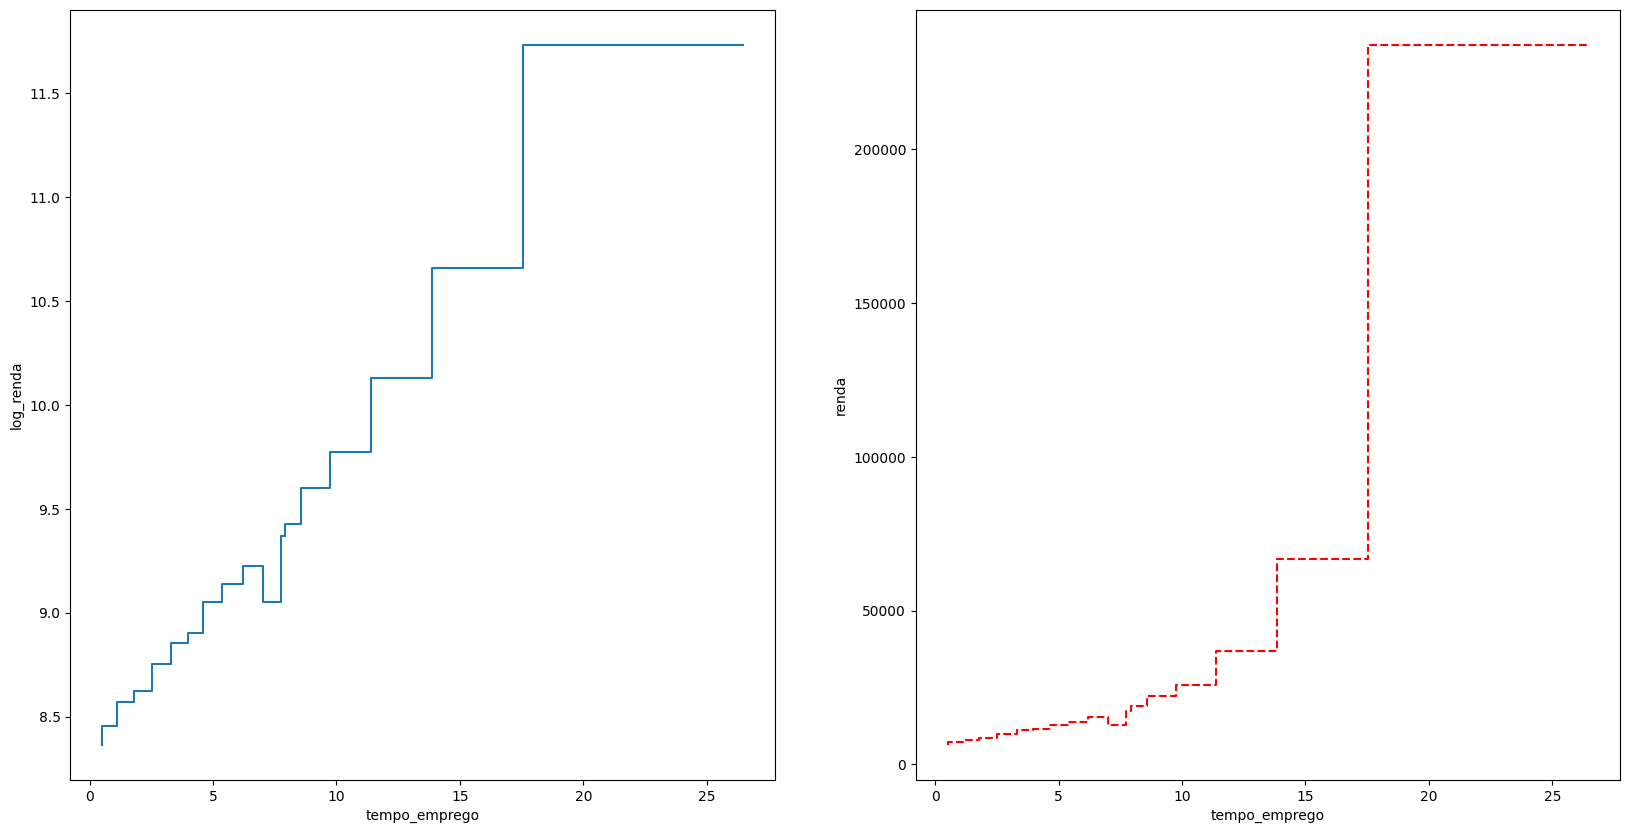

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(20, 10))

axs[0].set_xlabel('tempo_emprego')
axs[1].set_xlabel('tempo_emprego')

axs[0].set_ylabel('log_renda')
axs[1].set_ylabel('renda')

axs[0].step(df_cat['media_tempo_emprego'], df_cat['media_log_renda'])
axs[1].step(df_cat['media_tempo_emprego'], df_cat['media_renda'], 'r--')

Note que, com exceção do ponto em que agrupamos todas as entradas com tempo_emprego nulo na mesma média, a análise de perfil mostra que a função logarítimo é eficaz em linearizar a renda!

### Linearização

Experimente pelo menos duas técnicas de linearização vistas ao longo do módulo para melhorar o ajuste da variável ```tempo_emprego```. Compare o $R^2-ajustado$ e avalie se alguma delas apresentou resultados relevantes com relação ao primeiro modelo.


A substituição de $renda$ por $log(renda)$ é uma linearização muito difícil de melhorar. Vamos ver o que conseguimos fazer com as técnicas aprendidas em aula para melhorar a regressão ingênua sem mudar a variável resposta.

Primeiro, vamos tentar achar um valor de $k$, tal que $exp(tempo\_emprego*k)$ resulta na melhor regressão para $renda$. Com isso, podemos substituir $tempo\_emprego$ por $exp(tempo\_emprego * k)$

In [13]:
ks = np.linspace(.00001, 0.3, 256)
corrs = [np.corrcoef(x=np.exp(df['tempo_emprego']*k), y=df['renda'])[0,1] for k in ks]

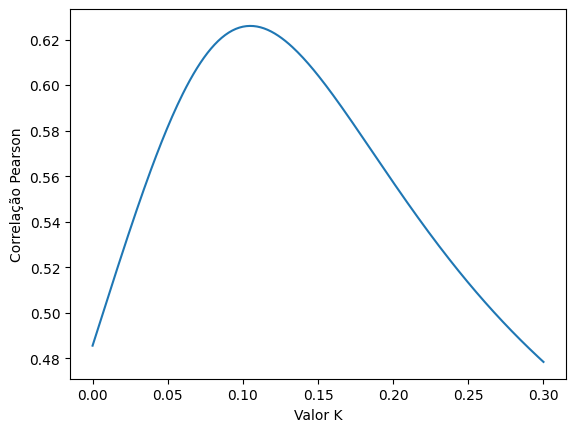

In [14]:
fig, ax = plt.subplots()
ax.set_ylabel('Correlação Pearson')
ax.set_xlabel('Valor K')
ax.plot(ks, corrs)

In [15]:
max_k = None
max_corr = 0
for k, corr in zip(ks, corrs):
    if corr >= max_corr:
        max_corr = corr
        max_k = k

In [16]:
reg_1 = smf.ols('renda ~ np.exp(tempo_emprego*max_k) + idade + sexo + posse_de_imovel + tipo_renda + educacao', data=df).fit()
reg_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                 3.245e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        16:03:03   Log-Likelihood:            -7.6086e+06
No. Observations:              600000   AIC:                         1.522e+07
Df Residuals:                  599987   BIC:                         1.522e+07
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                       -1.238e+04   1083.831    -11.419      0.000   -1.45e+04   -1.03e+04
sexo[T.M]                       -3393.1732    221.047    -15.350      0.000   -3826.418   -2959.928
posse_de_imovel[T.S]             5183.8859    216.163     23.981      0.000    4760.213    5607.559
tipo_renda[T.Bolsista]          -1.079e+04   4463.730     -2.417      0.016   -1.95e+04   -2038.426
tipo_renda[T.Empresário]         2849.7119    253.733     11.231      0.000    2352.404    3347.020
tipo_renda[T.Pensionista]       -6614.0067    363.838    -18.178      0.000   -7327.117   -5900.897
tipo_renda[T.Servidor público]   1702.4781    372.915      4.565      0.000     971.577    2433.379
educacao[T.Médio]               -3153.3755    952.045     -3.312      0.001   -5019.353   -1287.398
educacao[T.Pós graduação]         918.1309   3243.796      0.283      0.777   -5439.605    7275.866
educacao[T.Superior completo]    -480.8255    961.982     -0.500      0.617   -2366.279    1404.628
educacao[T.Superior incompleto]  1900.1589   1076.858      1.765      0.078    -210.448    4010.765
np.exp(tempo_emprego * max_k)    1.243e+04     21.203    586.381      0.000    1.24e+04    1.25e+04
idade                              40.1398     12.197      3.291      0.001      16.234      64.046
==============================================================================
Omnibus:                  1428138.427   Durbin-Watson:                   1.932
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      39027563257.500
Skew:                          23.955   Prob(JB):                         0.00
Kurtosis:                    1251.522   Cond. No.                     2.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Linearizar $tempo\_emprego$ com $exp(tempo\_emprego * max_k)$ melhora bastante a regressão para a variável resposta $renda$.

Agora, vamos tentar uma regressão segmentada com $C_0 = 10$.

In [17]:
c0 = 10
df['tempo_emprego_s1'] = (df['tempo_emprego'] <= c0) * df['tempo_emprego'] + (df['tempo_emprego'] > c0) * c0
df['tempo_emprego_s2'] = (df['tempo_emprego'] <= c0) * 0 + (df['tempo_emprego'] > c0) * (df['tempo_emprego'] - c0)

In [18]:
df_test['tempo_emprego_s1'] = (df_test['tempo_emprego'] <= c0) * df_test['tempo_emprego'] + (df_test['tempo_emprego'] > c0) * c0
df_test['tempo_emprego_s2'] = (df_test['tempo_emprego'] <= c0) * 0 + (df_test['tempo_emprego'] > c0) * (df_test['tempo_emprego'] - c0)

In [19]:
reg_2 = smf.ols('renda ~ tempo_emprego_s1 + tempo_emprego_s2 + idade + sexo + posse_de_imovel + tipo_renda + educacao', data=df).fit()
reg_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                 2.188e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        16:03:09   Log-Likelihood:            -7.6423e+06
No. Observations:              600000   AIC:                         1.528e+07
Df Residuals:                  599986   BIC:                         1.528e+07
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        1.018e+04   1162.363      8.754      0.000    7897.020    1.25e+04
sexo[T.M]                       -2660.4778    234.180    -11.361      0.000   -3119.463   -2201.493
posse_de_imovel[T.S]             6346.9009    228.706     27.751      0.000    5898.644    6795.157
tipo_renda[T.Bolsista]           6677.0263   4724.503      1.413      0.158   -2582.848    1.59e+04
tipo_renda[T.Empresário]         3157.8995    268.643     11.755      0.000    2631.368    3684.431
tipo_renda[T.Pensionista]        7913.7152    401.593     19.706      0.000    7126.607    8700.824
tipo_renda[T.Servidor público]   2669.4284    396.286      6.736      0.000    1892.721    3446.135
educacao[T.Médio]               -4740.8238   1007.046     -4.708      0.000   -6714.602   -2767.046
educacao[T.Pós graduação]       -4587.1174   3431.416     -1.337      0.181   -1.13e+04    2138.348
educacao[T.Superior completo]    -824.4408   1017.524     -0.810      0.418   -2818.756    1169.874
educacao[T.Superior incompleto]   689.3450   1139.097      0.605      0.545   -1543.248    2921.938
tempo_emprego_s1                -1527.4589     40.188    -38.008      0.000   -1606.227   -1448.691
tempo_emprego_s2                 1.439e+04     31.236    460.748      0.000    1.43e+04    1.45e+04
idade                              89.7427     13.067      6.868      0.000      64.132     115.353
==============================================================================
Omnibus:                  1448046.616   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      35804061520.532
Skew:                          24.894   Prob(JB):                         0.00
Kurtosis:                    1198.694   Cond. No.                     2.03e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.03e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
lowess = sm.nonparametric.lowess(df['renda'], df['tempo_emprego'], frac=2/3)
lowess_x, lowess_y = lowess[:, 0], lowess[:, 1]

(0.0, 500000.0)

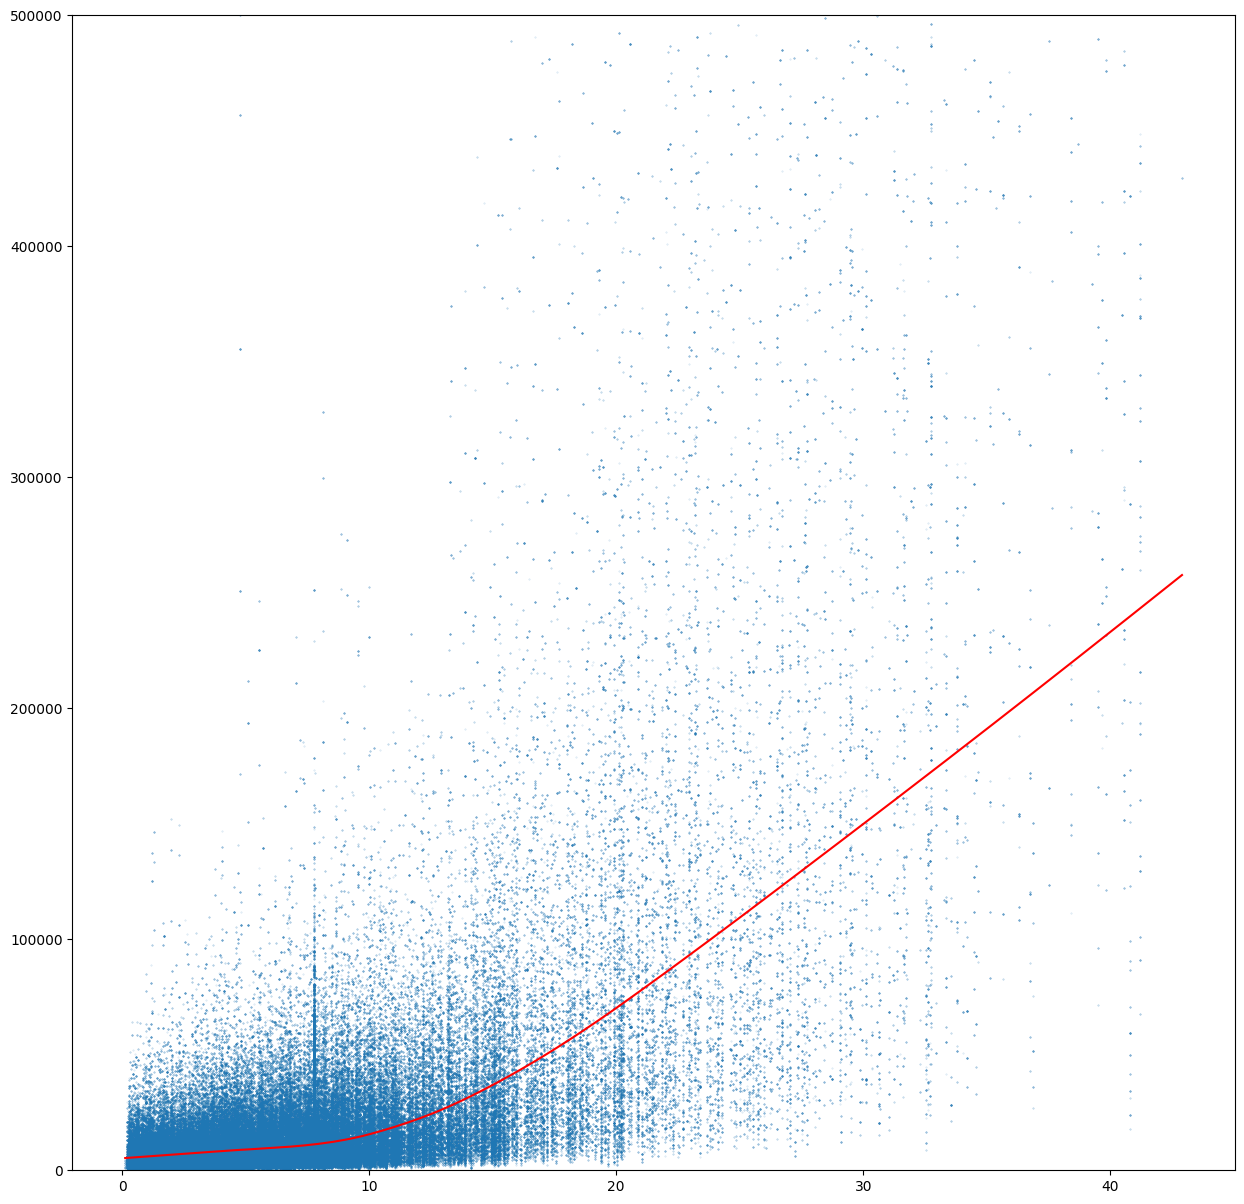

In [21]:
fig, ax = plt.subplots(figsize=(15,15))
ax.plot(lowess_x, lowess_y, 'r')
ax.scatter(x=df['tempo_emprego'], y=df['renda'], s=.1, alpha=1/4)
ax.set_ylim(bottom=0, top=500000)

In [22]:
lwss_f = interp1d(lowess_x, lowess_y, bounds_error=False)
df['tempo_emprego_lwss'] = lwss_f(df['tempo_emprego'])

In [23]:
df_test['tempo_emprego_lwss'] = lwss_f(df_test['tempo_emprego'])

In [24]:
reg_3 = smf.ols('renda ~ tempo_emprego_lwss + tempo_emprego + idade + sexo + posse_de_imovel + tipo_renda', data=df).fit()
reg_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  renda   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                 3.602e+04
Date:                Thu, 04 May 2023   Prob (F-statistic):               0.00
Time:                        16:04:31   Log-Likelihood:            -7.6291e+06
No. Observations:              600000   AIC:                         1.526e+07
Df Residuals:                  599990   BIC:                         1.526e+07
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                      -3177.7015    552.752     -5.749      0.000   -4261.078   -2094.325
sexo[T.M]                      -2598.8852    228.949    -11.351      0.000   -3047.617   -2150.153
posse_de_imovel[T.S]            6064.4163    223.542     27.129      0.000    5626.280    6502.552
tipo_renda[T.Bolsista]          7773.7994   4617.732      1.683      0.092   -1276.807    1.68e+04
tipo_renda[T.Empresário]        3442.9667    261.902     13.146      0.000    2929.647    3956.287
tipo_renda[T.Pensionista]       7357.8923    386.132     19.055      0.000    6601.085    8114.699
tipo_renda[T.Servidor público]  4057.0273    385.783     10.516      0.000    3300.904    4813.151
tempo_emprego_lwss                 2.8835      0.009    315.695      0.000       2.866       2.901
tempo_emprego                  -3884.3149     41.338    -93.964      0.000   -3965.337   -3803.293
idade                             30.5548     12.601      2.425      0.015       5.857      55.252
==============================================================================
Omnibus:                  1446960.386   Durbin-Watson:                   1.937
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      37530556279.945
Skew:                          24.819   Prob(JB):                         0.00
Kurtosis:                    1227.238   Cond. No.                     1.49e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.49e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Avaliando o modelo

Avalie os resultados dos modelos construidos na base de testes.

In [25]:
df_test['pred_0'] = reg.predict(df_test)
df['pred_0'] = reg.predict(df)

df_test['pred_exp'] = reg_1.predict(df_test)
df['pred_exp'] = reg_1.predict(df)

df_test['pred_seg'] = reg_2.predict(df_test)
df['pred_seg'] = reg_2.predict(df)

df_test['pred_lwss'] = reg_3.predict(df_test)
df['pred_lwss'] = reg_3.predict(df)

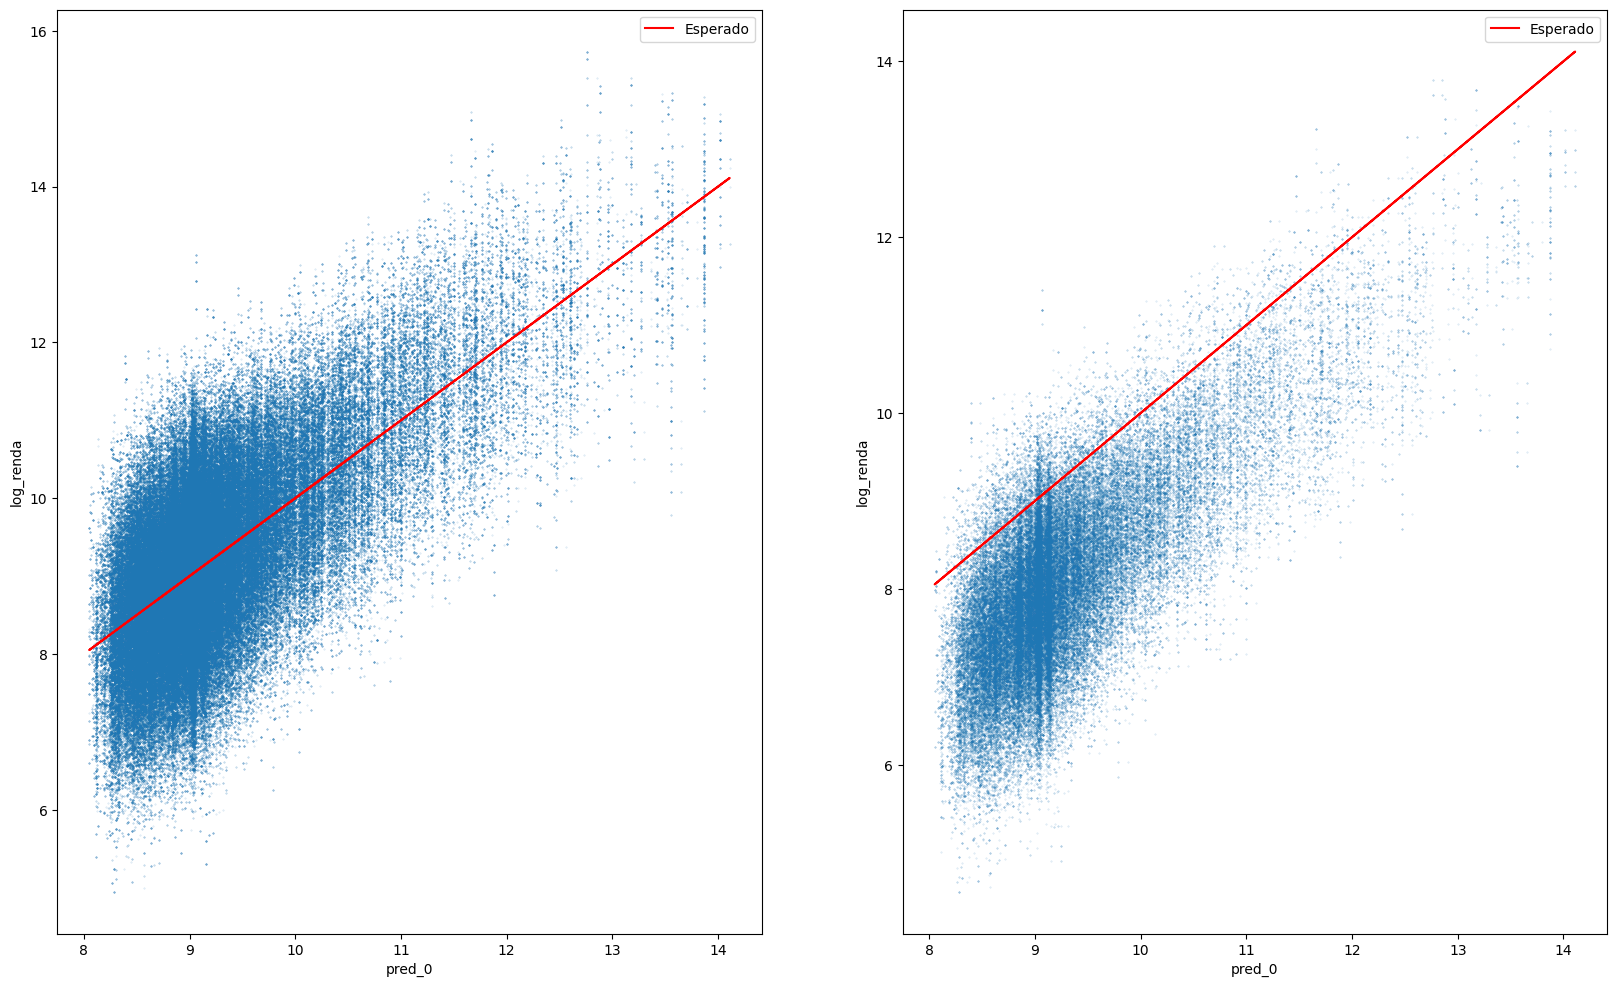

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))

ax[0].scatter(x=df['pred_0'], y=df['log_renda'], s=.1, alpha=1/4)
ax[0].plot(df['pred_0'], df['pred_0'], 'r-', label='Esperado')
ax[0].set_xlabel('pred_0')
ax[0].set_ylabel('log_renda')
ax[0].legend()


ax[1].scatter(x=df_test['pred_0'], y=df_test['log_renda'], s=.1, alpha=1/4)
ax[1].plot(df_test['pred_0'], df_test['pred_0'], 'r-', label='Esperado')
ax[1].set_xlabel('pred_0')
ax[1].set_ylabel('log_renda')
ax[1].legend()

Aparentemente, a base de testes tem algum viés em relação à base de treino!

In [27]:
r2_score(df_test['renda'], np.exp(df_test['pred_0']))

-2.3823477948345513

In [28]:
r2_score(df_test['renda'], df_test['pred_exp'])

-3.88480610124312

In [29]:
r2_score(df_test['renda'], df_test['pred_seg'])

-3.271071790771434

In [30]:
r2_score(df_test['renda'], df_test['pred_lwss'])

-3.4662550982750835